Questions:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks' closing prices?
    4.) What was the correlation between different stocks' daily returns?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior?
    

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [12]:
from pandas_datareader import data as DataReader

In [5]:
from datetime import datetime

In [6]:
from __future__ import division

In [7]:
# Apple, Google, Microsoft, Amazon
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [8]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day) # onw year ago

In [19]:
# Grab the data from yahoo
for stock in tech_list:
    globals()[stock] = DataReader.DataReader(stock, 'yahoo', start, end)

In [20]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-10-19,110.800003,111.750000,110.110001,111.730003,29759200,109.391116
2015-10-20,111.339996,114.169998,110.820000,113.769997,48967800,111.388405
2015-10-21,114.000000,115.580002,113.699997,113.760002,41795200,111.378620
2015-10-22,114.330002,115.500000,114.099998,115.500000,41654100,113.082193
2015-10-23,116.699997,119.230003,116.330002,119.080002,59366900,116.587254


In [21]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,105.004325,105.937857,104.102024,105.034325,4.063343e+07,104.045248
std,8.284004,8.301655,8.266571,8.283788,1.742752e+07,8.108977
min,90.000000,91.669998,89.470001,90.339996,1.304640e+07,89.853242
25%,97.295000,98.205000,96.542502,97.137499,2.887890e+07,96.300820
50%,105.494999,106.279999,104.849998,105.735001,3.574055e+07,104.647514
75%,111.625002,112.710001,110.462499,112.055000,4.658642e+07,110.638098
max,123.129997,123.820000,121.620003,122.570000,1.333697e+08,120.004194


In [22]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2015-10-19 to 2016-10-17
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


# Basic Analysis of Stock Information

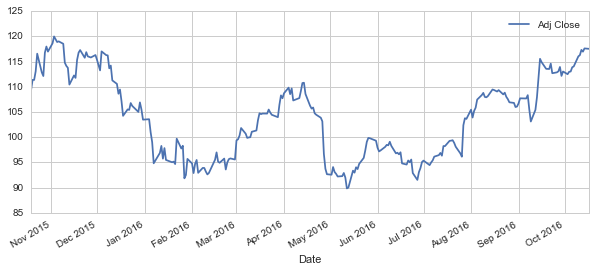

In [26]:
AAPL['Adj Close'].plot(legend=True, figsize=(10, 4))

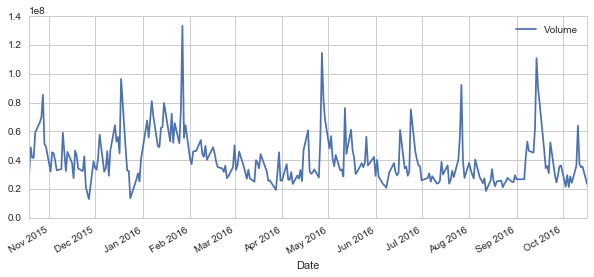

In [28]:
AAPL['Volume'].plot(legend=True, figsize=(10, 4))

### Moving Average

For more info on the moving average check out the following links:

1. http://www.investopedia.com/terms/m/movingaverage.asp
2. http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [37]:
ma_day = [10, 20, 50]
for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    # Moving mean
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

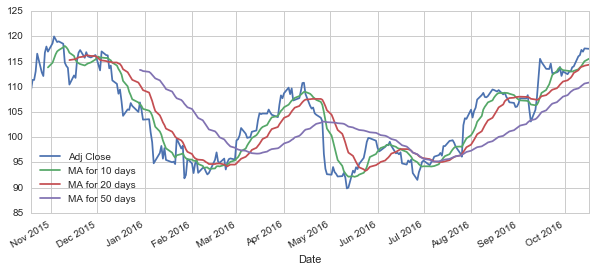

In [48]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize=(10, 4))

# Daily Return Analysis

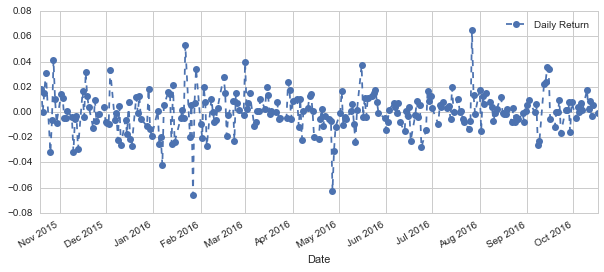

In [73]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(linestyle='--', marker='o', figsize=(10, 4), legend=True)

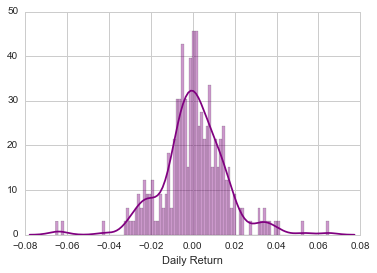

In [75]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

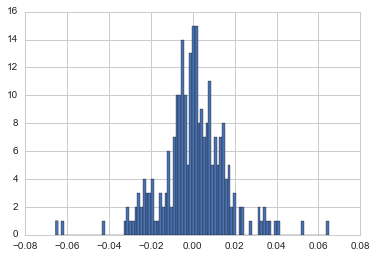

In [78]:
# or
AAPL['Daily Return'].hist(bins=100)

In [83]:
closing_df = DataReader.DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [85]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-10-19,109.391116,573.150024,666.099976,46.348899
2015-10-20,111.388405,560.880005,650.280029,46.494896
2015-10-21,111.378620,555.770020,642.609985,45.940111
2015-10-22,113.082193,563.909973,651.789978,46.747955
2015-10-23,116.587254,599.030029,702.000000,51.458763


In [86]:
tech_rets = closing_df.pct_change()

In [87]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-10-19,NaN,NaN,NaN,NaN
2015-10-20,0.018258,-0.021408,-0.023750,0.003150
2015-10-21,-0.000088,-0.009111,-0.011795,-0.011932
2015-10-22,0.015295,0.014646,0.014285,0.017585
2015-10-23,0.030996,0.062280,0.077034,0.100770


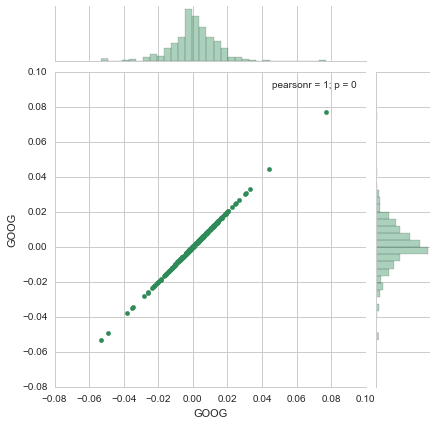

In [96]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

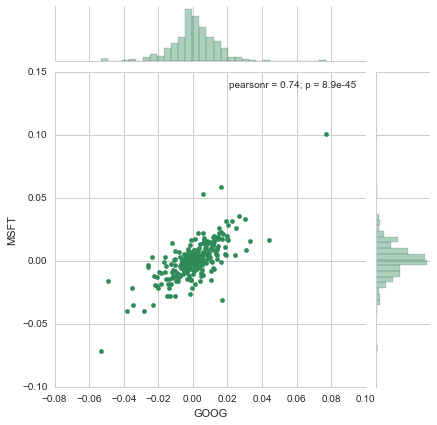

In [97]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter', color='seagreen')

In [99]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-10-19,NaN,NaN,NaN,NaN
2015-10-20,0.018258,-0.021408,-0.023750,0.003150
2015-10-21,-0.000088,-0.009111,-0.011795,-0.011932
2015-10-22,0.015295,0.014646,0.014285,0.017585
2015-10-23,0.030996,0.062280,0.077034,0.100770


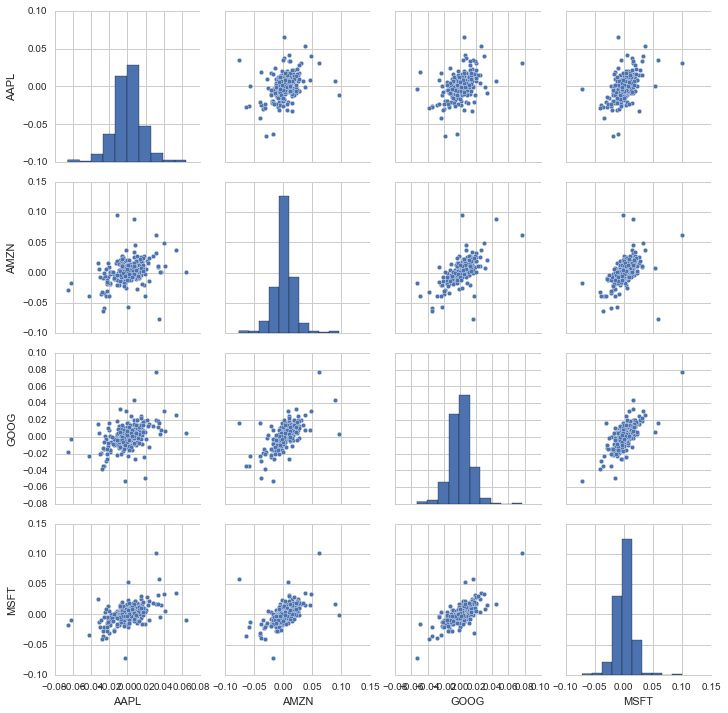

In [118]:
sns.pairplot(tech_rets.dropna())

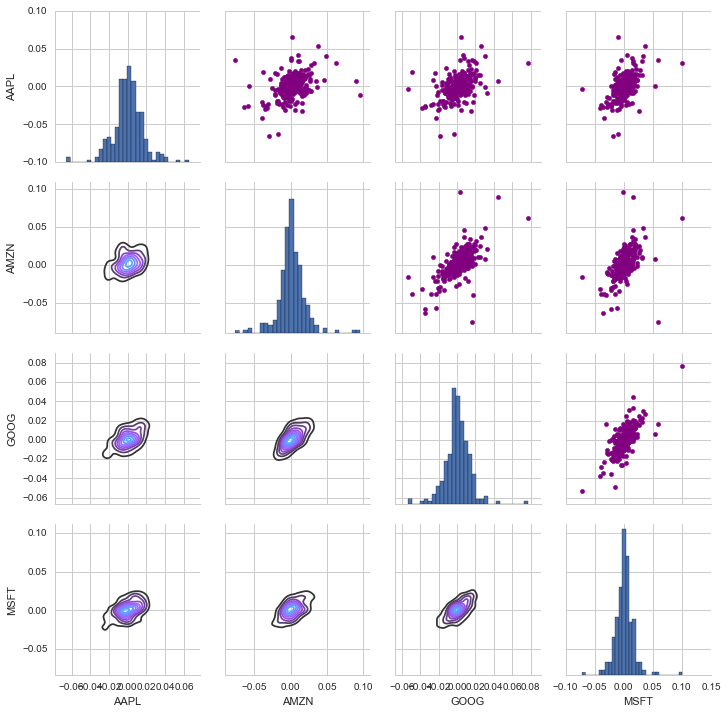

In [104]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_diag(plt.hist, bins=30)

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

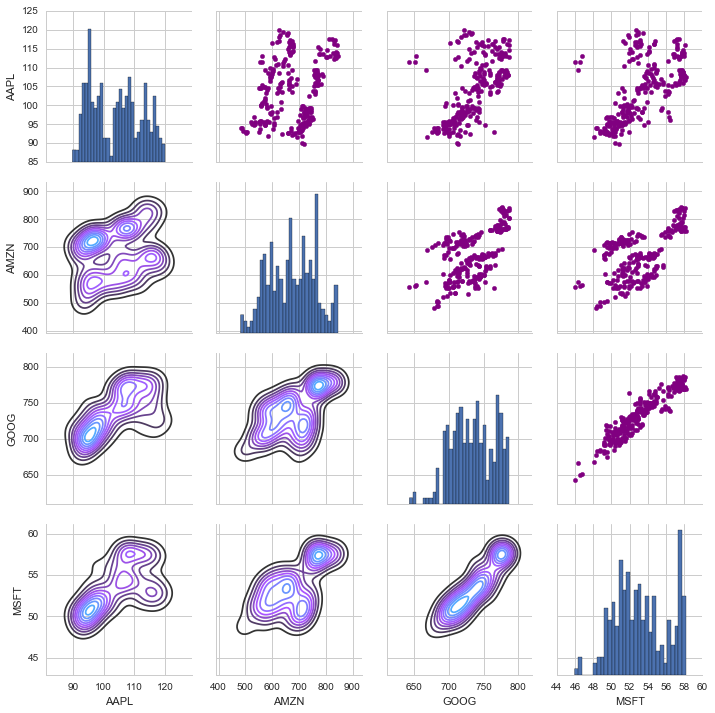

In [105]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_diag(plt.hist, bins=30)

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

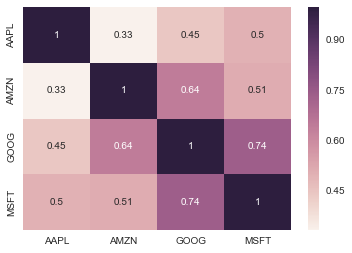

In [116]:
sns.heatmap(tech_rets.corr(), annot=True)

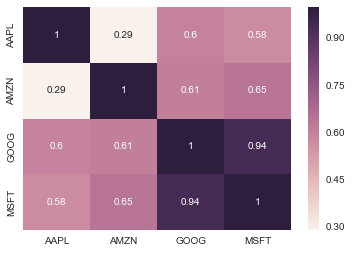

In [119]:
sns.heatmap(closing_df.corr(), annot=True)

# Risk Analysis

In [120]:
rets = tech_rets.dropna()

In [121]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-10-20,0.018258,-0.021408,-0.023750,0.003150
2015-10-21,-0.000088,-0.009111,-0.011795,-0.011932
2015-10-22,0.015295,0.014646,0.014285,0.017585
2015-10-23,0.030996,0.062280,0.077034,0.100770
2015-10-26,-0.031911,0.015992,0.015356,0.026102


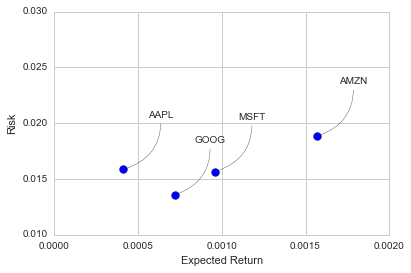

In [149]:
plt.scatter(rets.mean(), rets.std(), s=np.pi*20)

plt.xlabel('Expected Return')
plt.ylabel('Risk') # 這邊把rets標準差越大，當作風險越大

plt.ylim([0.01, 0.03])
plt.xlim([0, 0.002])

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy=(x, y), xytext=(50, 50),
        textcoords='offset points', ha='right', va='bottom',
        arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=-0.4'))

## Value at Risk
### 1. Value at risk using the "bootstrap" method
We will calculate the empirical quantiles(經驗上的位數) from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

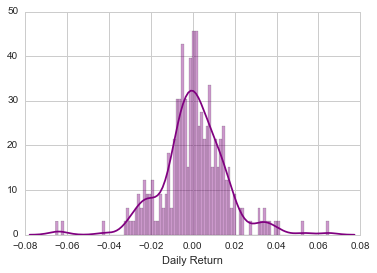

In [151]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [163]:
rets['AAPL'].quantile(0.05)
# 這邊的意思是，在95% confidence下，最差的daily loss不會超過-0.025
# 也就是若我們投資100萬，我們一日的最高損失為1000000 * 0.025 = 25000

# 這邊對信心水準的解釋好像怪怪的，先保留 

-0.02538480660671788

### 2. Value at Risk using the Monte Carlo method
我們假設效率市場成立，使用蒙地卡羅法，model選定GBM，模擬股價隨機漫步的落點

* [Monte Carlo method](http://wiki.mbalib.com/zh-tw/%E8%92%99%E7%89%B9%E5%8D%A1%E7%BD%97%E6%96%B9%E6%B3%95)
* [Monte Carlo method for stocks](http://www.investopedia.com/articles/07/montecarlo.asp) <- 看這個

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.
This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

GBM是一種Markov process，若process滿足下面的公式，我們說這個process follow GBM

$$\frac{\Delta S}{S} = \mu\Delta t + \sigma \epsilon \sqrt{\Delta t}$$ 

* S為stock price
* mu為expected return(前面有算過，也就是daily return的平均)
* sigma是returns的標準差
* t是時間
* epsilon是random variable

以上公式可以寫成:

$$ \Delta S = S(\mu\Delta t + \sigma \epsilon \sqrt{\Delta t}) $$ 

現在我們可以看出，stock price的變化是由兩個部分所組成

第一個部分稱為`drift`，由expected return乘上時間差距

第二部分稱為`shock`

drift -> shock up or down -> drift -> shock up or down -> .... * N次

In [169]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [179]:
def stock_monte_carlo(start_price, days, mu, sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1, days): # 1, 2, ... , 364
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt)) # 這邊將epsilon用normal dist來模擬亂數
        
        drift[x] = mu*dt
        # S(n)   =   S(n-1)   +     delta S(n-1)
        price[x] = price[x-1] + (price[x-1]  * (drift[x] + shock[x]))
    
    return price

In [180]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-10-19,661.179993,666.820007,659.580017,666.099976,1477300,666.099976
2015-10-20,664.039978,664.719971,644.195007,650.280029,2490000,650.280029
2015-10-21,654.150024,655.869995,641.729980,642.609985,1791100,642.609985
2015-10-22,646.700012,657.799988,644.010010,651.789978,4071000,651.789978
2015-10-23,727.500000,730.000000,701.500000,702.000000,6653900,702.000000


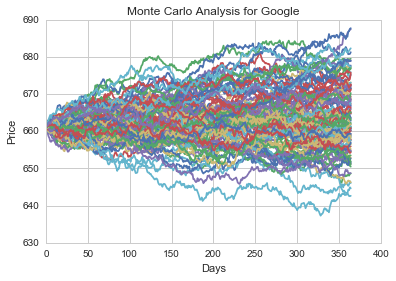

In [181]:
start_price = 661.18

for run in xrange(100): # run 100次
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

# 用蒙地卡羅法模擬365天後的stock price

In [182]:
runs = 100000

simulations = np.zeros(runs)

for run in xrange(runs): # 我們跑100000次，然後把每次的最終落點放到array保存起來
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

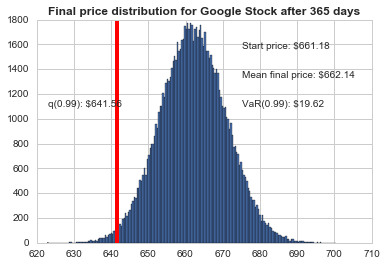

In [183]:
q = np.percentile(simulations, 1)

plt.hist(simulations, bins=200)

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');